In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
coord_x = [135:190, 210:420]
coord_y = [323:338, 400:479]

SyntaxError: invalid syntax (<ipython-input-3-5ce12a283b15>, line 1)

## 1 - detectar se entrei no processo do captcha 

pegar a posição do "input numbers"

pegar a posição dos numeros

fazer a logica para digitar

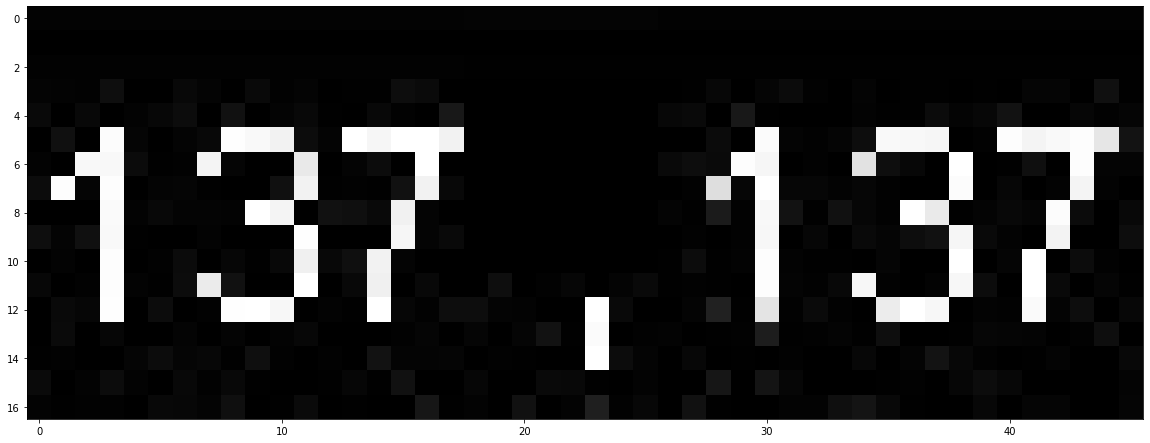

In [29]:
game_img = cv.imread('../img_59.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[5:22, 174:220])

[0.99985945 0.9978112 ]
[(13, 5), (40, 5)]


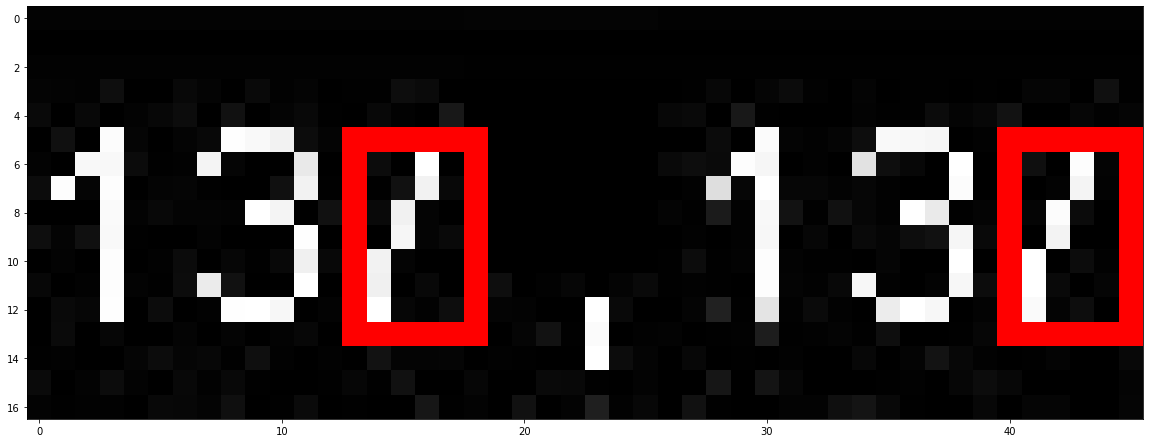

In [42]:
#find(game_img, cv.imread(f'mgs1.jpeg', cv.IMREAD_UNCHANGED))
number_img = cv.imread('../images/7.jpeg', cv.IMREAD_UNCHANGED)
game_img = cv.imread('../img_59.jpeg', cv.IMREAD_UNCHANGED)[5:22, 174:220]
locations = find(game_img, number_img)

In [43]:
findNumbers(cv.imread('../img_59.jpeg', cv.IMREAD_UNCHANGED)[5:22, 174:220])

[1, 3, 7, 1, 3, 7]

In [31]:
#função para mostrar se está sendo encontrado algo, usar para debug
def find(game_image, number_image, threshold=0.9, debug_mode=None):
    
    result = cv.matchTemplate(game_image, number_image, cv.TM_CCOEFF_NORMED)
    locations = np.where(result >= threshold)
    print(result[locations])
    locations = list(zip(*locations[::-1]))
    print(locations)
    if len(locations):
        line_color = (255, 0, 0)
        line_type = cv.LINE_4
        marker_color = (255, 0, 255)
        marker_type = cv.MARKER_CROSS
        
        h, w, c = number_image.shape
        for (x, y) in locations:
            top_left = (x, y)
            bottom_right = (x + w, y + h)
            # Draw the box
            cv.rectangle(game_image, top_left, bottom_right, color=line_color, 
                        lineType=line_type, thickness=1)
        #plt.figure()
        plt.figure(figsize = (20,22))
        plt.imshow(game_img)

    return locations

In [4]:
def checkMsgOnScreen(game_image, needle_image, threshold=0.9):
    result = cv.matchTemplate(game_image, needle_image, cv.TM_CCOEFF_NORMED)
    return np.any(result >= threshold)

In [39]:
def findNumbers(game_image, threshold=0.9):
    matches = {}
    for i in [1,3,7]: # range(10):
        number_img = cv.imread(f'../images/{i}.jpeg', cv.IMREAD_UNCHANGED)
        result = cv.matchTemplate(game_image, number_img, cv.TM_CCOEFF_NORMED)
        locations = np.where(result >= threshold)
        locations = list(zip(*locations[::-1]))
        for loc in locations: 
            matches[loc[0]] = i
    result = []
    for key in sorted(matches):
        result.append(matches[key])
    return result

In [76]:
#find(game_img, cv.imread(f'mgs1.jpeg', cv.IMREAD_UNCHANGED))
number_img = cv.imread('msg1.jpeg', cv.IMREAD_UNCHANGED)
game_img = cv.imread('img_31.jpeg', cv.IMREAD_UNCHANGED)[135:190, 210:420]
checkMsgOnScreen(game_img, number_img)

True

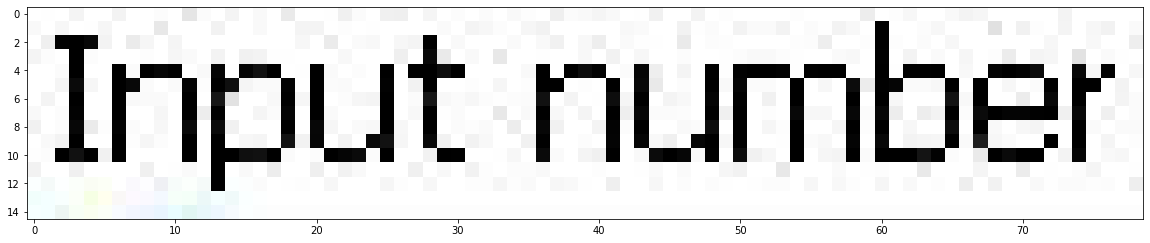

In [56]:
game_img = cv.imread('img_37.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[323:338, 400:479])

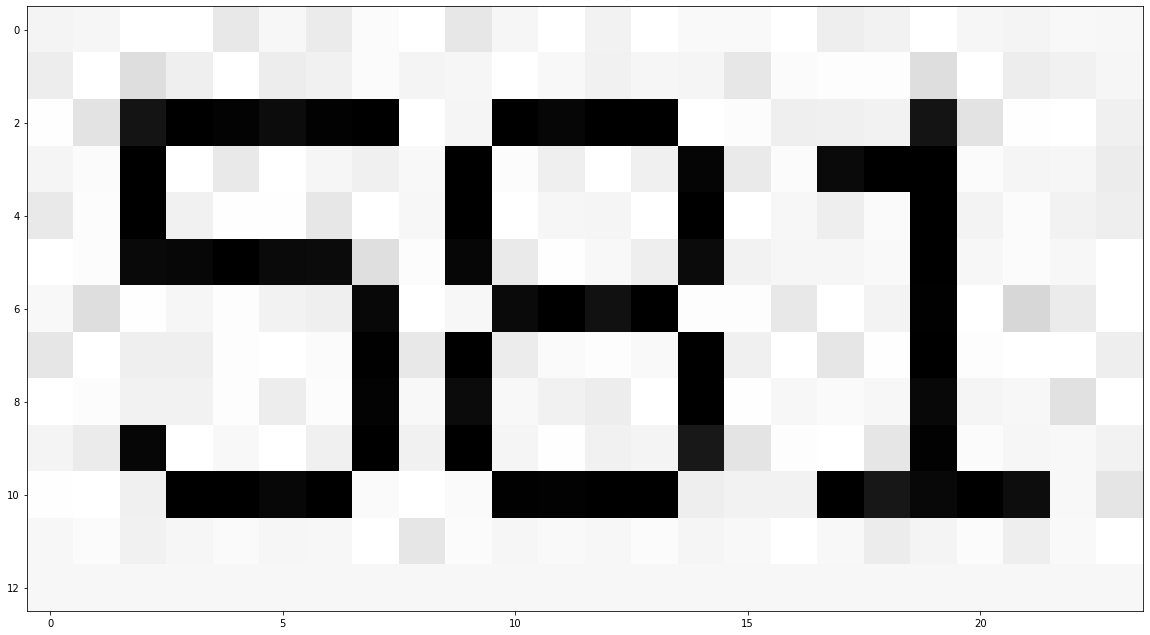

In [70]:
game_img = cv.imread('img_37.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[172:185, 237:261])

In [44]:
for i in range(10):
    number_img = number_img = cv.imread(f'{i}.jpeg', cv.IMREAD_UNCHANGED)
    game_img = cv.imread('img_37.jpeg', cv.IMREAD_UNCHANGED)[172:185, 237:261]
    if checkMsgOnScreen(game_img, number_img):
        print(i)

1
5
8


In [71]:
findNumbers(game_img[172:185, 237:261])

[5, 8, 1]

## 2 - detectar os numeros do captcha